# 1Write a program to implement how to read and display a dataset in Python.

Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length

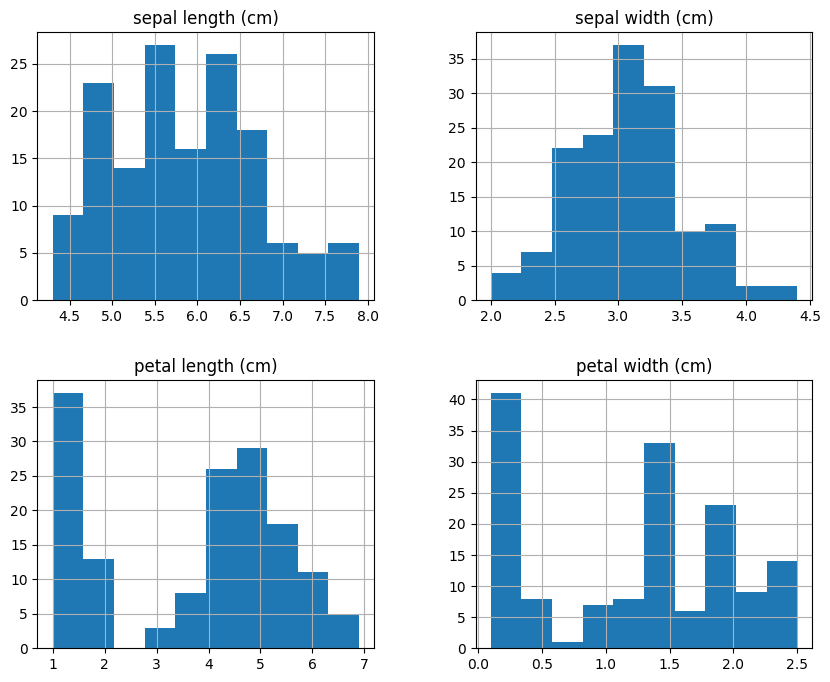

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
df=pd.DataFrame(iris.data, columns= iris.feature_names)
print("Dataset Head:")
print(df.head()) # Display the first few rows of the dataset
print("\nDataset Info:")
print(df.info()) # Display summary of the dataset including column data types and non-null counts
print("\nDataset Description:")
print(df.describe()) # Display statistical summary of numeric columns
print("\nDataset Shape:")
print(df.shape) # Display the dimensions of the dataset (rows, columns)
print("\nColumn Names:")
print(df.columns) # Display column names
print("\nMissing Values:")
print(df.isnull().sum()) # Display the number of missing values per column
# Optional: Plotting some basic visualizations
print("\nBasic Data Visualization:")
df.hist(figsize=(10, 8)) # Plot histograms for numeric columns
plt.show()

# 2Write a program to learn how to select features for machine learning

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Univariate Feature Selection
print("Univariate Feature Selection:")
# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X_train, y_train)
# Display scores and selected features
print("Feature scores:", selector.scores_)
print("Selected features:", X_train.columns[selector.get_support()])

# 2. Recursive Feature Elimination (RFE)
print("\nRecursive Feature Elimination (RFE):")
model = RandomForestClassifier(random_state=42)  # Define the model
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)
# Display selected features
print("Selected features:", X_train.columns[rfe.support_])

# 3. Feature Importance from Random Forest
print("\nFeature Importance from Random Forest:")
model.fit(X_train, y_train)  # Train the model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Display feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")


Univariate Feature Selection:
Feature scores: [ 74.7572012   33.41979913 713.45534904 526.54162416]
Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

Recursive Feature Elimination (RFE):
Selected features: Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

Feature Importance from Random Forest:
Feature ranking:
petal width (cm): 0.4339818709871682
petal length (cm): 0.4173081338019912
sepal length (cm): 0.10410500706117767
sepal width (cm): 0.04460498814966301


# 3Write the program to implement Data Pre-processing for Machine learning

In [6]:
import pandas as pd
import numpy as np
# Load data
data = pd.DataFrame({
'age': [25, np.nan, 30, 45, np.nan],
'salary': [50000, 60000, np.nan, 65000, 70000],
'city': ['New York', 'Los Angeles', 'New York', 'San Francisco', np.nan],
'target': [1, 0, 1, 0, 1]
})
# Display the original data
print("Original Data:")
print(data)
# Display missing values
print("Missing values:")
print(data.isnull().sum())
# Percentage of missing values
print("percentage of Missing values:")
print(data.isnull().mean() * 100)
# Handling missing values
data = data.dropna()
print('after removing rows')
print(data)
#data = data.dropna(axis=1)
#print('after removing columns')
#print(data)
from sklearn.impute import SimpleImputer
# For numerical features, use mean imputation
#num_features = ['age', 'salary']
#imputer_num = SimpleImputer(strategy='mean')
#data[num_features] = imputer_num.fit_transform(data[num_features])
# For categorical features, use the most frequent value imputation
#cat_features = ['city']
#imputer_cat = SimpleImputer(strategy='most_frequent')
#data[cat_features] = imputer_cat.fit_transform(data[cat_features])
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encoding categorical features
cat_features = ['city']
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
data[col] = le.fit_transform(data[col])
label_encoders[col] = le
# Feature scaling
scaler = StandardScaler()
num_features = ['age', 'salary']
data[num_features] = scaler.fit_transform(data[num_features])
data.to_csv('cleaned_dataset.csv', index=False)
# Example:
data1 = pd.read_csv('cleaned_dataset.csv')
print('df to csv')
print(data1)

Original Data:
    age   salary           city  target
0  25.0  50000.0       New York       1
1   NaN  60000.0    Los Angeles       0
2  30.0      NaN       New York       1
3  45.0  65000.0  San Francisco       0
4   NaN  70000.0            NaN       1
Missing values:
age       2
salary    1
city      1
target    0
dtype: int64
percentage of Missing values:
age       40.0
salary    20.0
city      20.0
target     0.0
dtype: float64
after removing rows
    age   salary           city  target
0  25.0  50000.0       New York       1
3  45.0  65000.0  San Francisco       0
df to csv
   age  salary  city  target
0 -1.0    -1.0     0       1
1  1.0     1.0     1       0


# 4Write a program to implement Classification Algorithm. Calculate the accuracy, precision, recall

In [7]:
import numpy as np
import pandas as pd
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred1=knn.predict(X_test)
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
print("Confusion Matrix:\n", cm)
print("classification report", classification_report(y_test, y_pred1))
#print("KNN_score=:",knn.score(X_test, y_test))

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 5.Write a program to demonstrate SVM with different kernel methods.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the SVM models with different kernels
from sklearn import svm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    models[kernel] = model
y_pred = model.predict(X_test)
# Print the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(f"Kernel: {kernel}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("*"*50)

Kernel: sigmoid


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.30      1.00      0.46         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

Confusion Matrix:
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]
**************************************************


# 6Comparison of Machine Learning techniques

In [10]:
import numpy as np
import pandas as pd
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("KNN = ", knn.score(X_test,y_test))
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)
print("SVM=", model.score(X_test, y_test))
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("DT=", tree.score(X_test, y_test))
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)
print("RF=",forest.score(X_test, y_test))
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic = ", logreg.score(X_test, y_test))
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)
print("Naive=", nb.score(X_test, y_test))

KNN =  1.0
SVM= 1.0
DT= 1.0
RF= 1.0
Logistic =  1.0
Naive= 0.9777777777777777


# 7Write a program to create the clustering model.

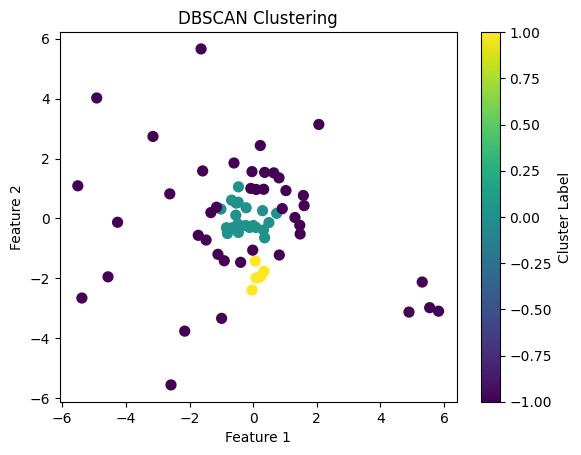

In [11]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.randn(50, 2) # 100 data points with 2 features
# Apply DBSCAN clustering
X = np.vstack([X, np.random.uniform(low=-6, high=6, size=(20, 2))])
dbscan = DBSCAN(eps=0.5, min_samples=5) # eps is the maximum distance between points in the same cluster, min_samples is the minimum number of points to form a dense region
labels = dbscan.fit_predict(X)
# Plot the data points and clustering results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 8Write a program to create two clustering model on same dataset. Compare the results of these two algorithms and comment on the quality of clustering.

In [ ]:
pip install scikit-learn scikit-learn-extra
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
# Load data: 50 data points with 2 features
np.random.seed(42)
X = np.random.randn(50, 2)
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# Get the cluster centers and labels
centers = kmeans.cluster_centers_
Klabels = kmeans.labels_
kmeans_inertia = kmeans.inertia_
#Measure cluster quality
kmeans_silhouette = silhouette_score(X, Klabels)
kmeans_db = davies_bouldin_score(X, Klabels)
#Apply k-mediods clustering
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X)
# Get the cluster centers (medoids) and labels
medoids = kmedoids.cluster_centers_
KMlabels = kmedoids.labels_
#Measure cluster quality
kmedoids_silhouette = silhouette_score(X, KMlabels)
kmedoids_db = davies_bouldin_score(X, KMlabels)
print("K-Means:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db:.4f}")
print(f"Inertia (within-cluster sum of squares): {kmeans_inertia:.4f}")
print("\nK-Medoids:")
print(f"Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmedoids_db:.4f}")
print("Higher SS_Score -> well-separated clusters, lower DB_Index ->better clustering")
print("For K-Means, a lower Inertia -> more compact clusters")
# Plot the data points and cluster centers
# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=Klabels, cmap='viridis', marker='o')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=KMlabels, cmap='viridis', marker='o')
plt.title("K-Medoids Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

# B1 Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy: 1.00


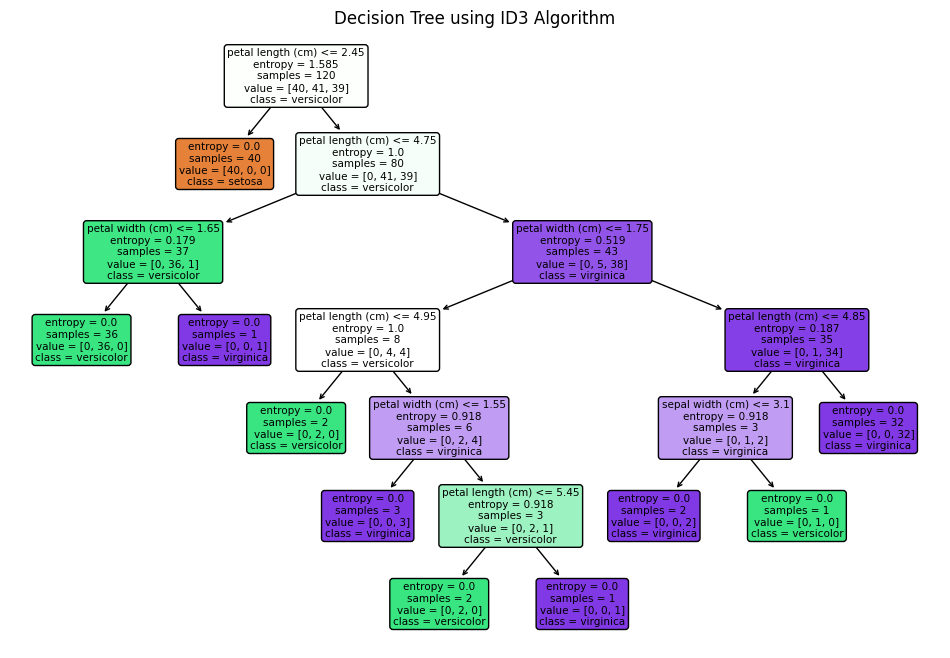

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal 

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
print(df.head())
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Decision Tree Classifier with the ID3 algorithm
# In sklearn, you can set the criterion to "entropy" to use the ID3 algorithm
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
# Train the model
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
# Display the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree using ID3 Algorithm")
plt.show()
# Print the tree structure
tree_structure = export_text(clf, feature_names=iris.feature_names)
print(tree_structure)

# B2 Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [17]:
# import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)
#Make predictions
y_pred = mlp.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 97.78%


# B3 Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [19]:
#Naive Bayes code
#i. iris dataset
import numpy as np
import pandas as pd
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)
print("classification report", classification_report(y_test, y_pred))
#Validate the model on Unseen data
test_new=np.array([[4.5,1.2,3.1,2.1]])
pred=nb.predict(test_new)
print('predicted unseen data label')
if pred==0:
    print('Setosa')
elif pred==1:
    print('Versicolor')
else:
    print('Verginica')

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


predicted unseen data label
Versicolor


In [ ]:
ii.
# dataset: NaiveBayes_Data.csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
# Load the data from CSV
data = pd.read_csv('NaiveBayes_Data.csv')
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
print(data.columns)
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)
print("classification report", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Naive Bayes Classifier: {accuracy * 100:.2f}%')
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of actual and predicted labels:")
print(results.head(50))

# 4 Write a program to demonstrate Reinforcement learning.

In [ ]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
# Create the Taxi environment
env = gym.make('Taxi-v3')
# Q-table initialization
q_table = np.zeros([env.observation_space.n, env.action_space.n])
#Hyperparameter
alpha = 0.1 # Learning rate
gamma = 0.99 # Discount factor
epsilon = 0.1 # Exploration rate
episodes = 1000 # Number of training episodes
exploration_decay = 0.999
min_eps = 0.1
# List to store the rewards for each episode
rewards = []
for episode in range(episodes):
state = env.reset()
total_reward = 0
done = False
while not done:
# Exploration-exploitation tradeoff
if random.uniform(0, 1) < epsilon:
action = env.action_space.sample() # Explore
else:
action = np.argmax(q_table[state]) # Exploit
# Take the action
next_state, reward, done, _ = env.step(action)
# Update Q-value
best_next_action = np.argmax(q_table[next_state])
q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])
state = next_state
total_reward += reward
#Decay the exploration probability
epsilon = max(min_eps, epsilon * exploration_decay)
rewards.append(total_reward)
# Plotting the rewards over episodes
plt.plot(rewards)
plt.title('Total Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()
# Display the Q-table
print("Q-table:")
print(q_table

# B5Write a program to Implement CNN models for classification of images

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# Load the MNIST dataset (images and labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Preprocess the data - Reshape the data to fit the CNN input grayscale images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Build the CNN model
model = models.Sequential()
# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the results from the convolutional layers
model.add(layers.Flatten())
# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))
# Output layer with 10 neurons for classification (digits 0-9)
model.add(layers.Dense(10, activation='softmax'))
# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")
# visualize some predictions
predictions = model.predict(x_test)
# Visualizing the first few test images and their predictions
for i in range(3):
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predictions[i].argmax()} | True: {y_test[i]}")
plt.show()